# EDO con condiciones iniciales


**Ejemplo (EDO de primer orden):** Para resolver ecuaciones diferenciales, podemos hacer uso de diversas librerías. En particular, nos interesa estudiar la función *scipy.integrate.solve_ivp("Ecuación diferencial a solucionar","Extremos del intervalo que quiero integrar","Condiciones iniciales","Método de solución","Lista de tiempos en donde queremos que se evalúe la función",...)*. \\
Resolver la ecuación diferencial: \\
*dy/dt = -y*, *y(0)=1*, \\
en el intervalo *0<=t<=10*, utilizando la función de Scipy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
def fun(t,y):
  return [-y]

In [4]:
y0 = [1]
t_span = [0,10]

sol = solve_ivp(fun,t_span,y0)

In [5]:
sol.t

array([ 0.        ,  0.10001999,  1.03186487,  1.90765136,  2.78720278,
        3.66720722,  4.54883436,  5.43428935,  6.3287186 ,  7.24349302,
        8.20147297,  9.24208996, 10.        ])

In [6]:
sol.y # OJO, PILLE QUE ES UNA LISTA DENTRO DE OTRA LISTA

array([[1.00000000e+00, 9.04819329e-01, 3.56604349e-01, 1.48607809e-01,
        6.16975543e-02, 2.56034390e-02, 1.06078348e-02, 4.37824013e-03,
        1.79098363e-03, 7.17942810e-04, 2.75699274e-04, 9.75482058e-05,
        4.57231383e-05]])

In [7]:
sol.y[0] # Ahora sí es una lista

array([1.00000000e+00, 9.04819329e-01, 3.56604349e-01, 1.48607809e-01,
       6.16975543e-02, 2.56034390e-02, 1.06078348e-02, 4.37824013e-03,
       1.79098363e-03, 7.17942810e-04, 2.75699274e-04, 9.75482058e-05,
       4.57231383e-05])

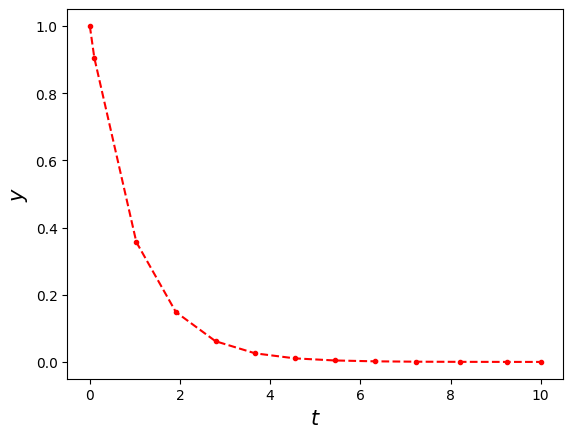

In [8]:
plt.plot(sol.t,sol.y[0], 'r.--')
plt.xlabel('$t$',size=15)
plt.ylabel('$y$',size=15)
plt.show()

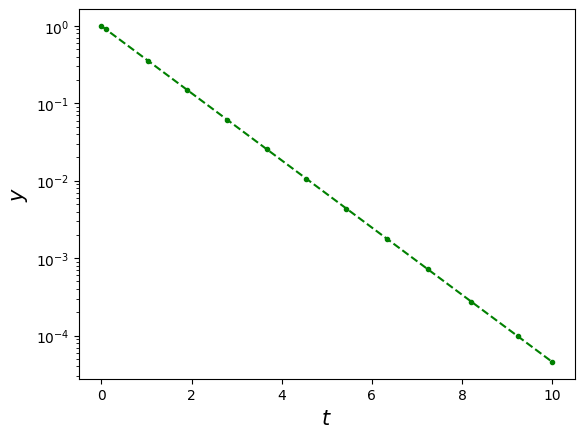

In [9]:
plt.semilogy(sol.t,sol.y[0], 'g.--')
plt.xlabel('$t$',size=15)
plt.ylabel('$y$',size=15)
plt.show()

**Ejemplo (Sistema de EDO acopladas):** Solucionar el ejemplo de Lotka-Volterra hecho anteriormente, utilizando la función de Scipy.

In [10]:
"""
Resolver el sistema de Lotka-Volterra para 0<=t<=100 utilizando el método de RK4, considerando que α = 1.1, β = 0.4, δ = 0.1 y γ = 0.4. Las condiciones iniciales son x(0) = 100 y y(0) = 20.
dx/dt = αx - βxy,
dy/dt = δxy - γy
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [11]:
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4

def fun(t,y):
  edo1 = alpha*y[0] - beta*y[0]*y[1]
  edo2 = delta*y[0]*y[1] - gamma*y[1]
  return [edo1,edo2]

y0 = [100,20]
t_span = [0,100]

sol = solve_ivp(fun,t_span,y0)

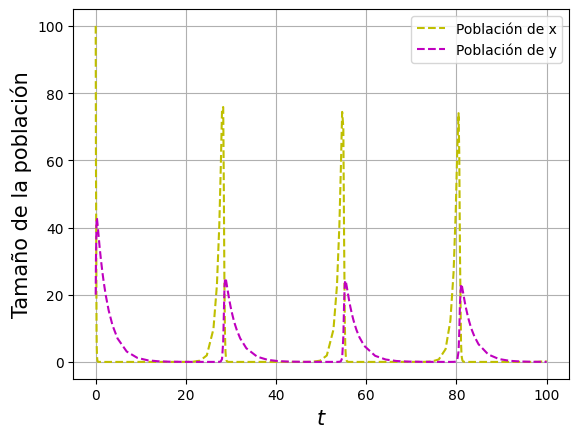

In [12]:
plt.plot(sol.t,sol.y[0],'y--',label='Población de x')
plt.plot(sol.t,sol.y[1],'m--',label='Población de y')
plt.xlabel('$t$',size = 15)
plt.ylabel('Tamaño de la población',size = 15)
plt.legend()
plt.grid()
plt.show()

In [13]:
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol_eval = solve_ivp(fun,t_span,y0,t_eval=t_eval)

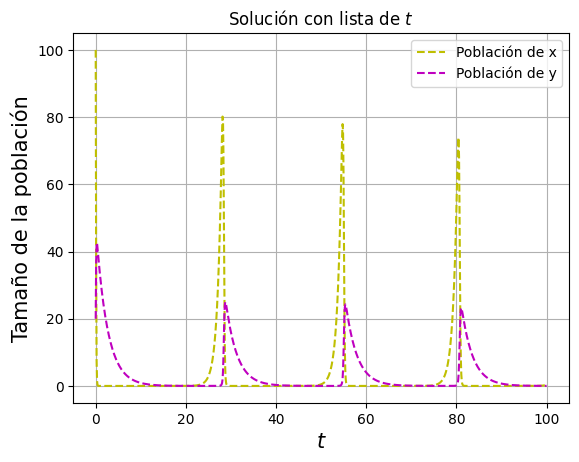

In [14]:
plt.plot(sol_eval.t,sol_eval.y[0],'y--',label='Población de x')
plt.plot(sol_eval.t,sol_eval.y[1],'m--',label='Población de y')
plt.title('Solución con lista de $t$')
plt.xlabel('$t$',size = 15)
plt.ylabel('Tamaño de la población',size = 15)
plt.legend()
plt.grid()
plt.show()

**Ejemplo (EDO de segundo orden):** Resolver la ecuación diferencial del oscilador armónico forzado, siendo la fuerza externa de la forma *F(t)=F_0sin(ωt)*, donde *m = 1*, *k = 1*, *γ = 0.1*, *F_0 = 1* y *ω = 2*.

In [15]:
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.integrate import solve_ivp

In [16]:
m = 1
k = 1
gamma = 0.1
omega = 2
F0 = 1

def fun(t,y):
  edo1 = y[1]
  edo2 = F0 * np.sin(omega*t) - k*y[0] - gamma*y[1]
  return [edo1,edo2]

In [17]:
t_span = [0,100]
y0 = [0.5,0]
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)

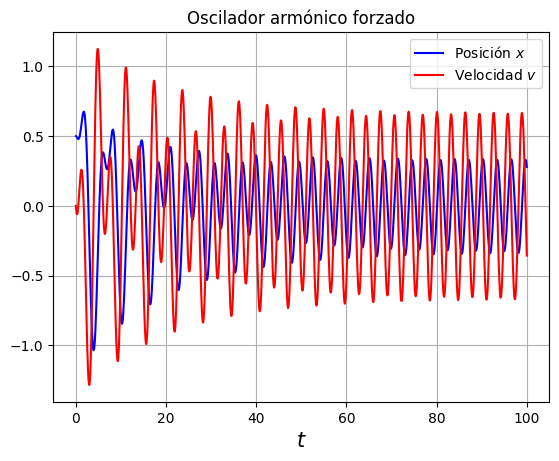

In [18]:
plt.plot(sol.t,sol.y[0],'b-',label='Posición $x$')
plt.plot(sol.t,sol.y[1],'r-',label='Velocidad $v$')
plt.title('Oscilador armónico forzado')
plt.xlabel('$t$',size = 15)
plt.legend()
plt.grid()
plt.show()

**Ejemplo (Oscilador de Duffing):** Es un modelo de oscilador armónico con un comportamiento caótico. Consideremos un oscilador de Duffing dado por la siguiente ecuación diferencial: \\
*x'' + δx' + αx + βx^3 = γcos(ωt)* \\
Solucionar en un intervalo de tiempo *0<=t<=10000*, con condiciones inciales *x(0) = 1 y x'(0) = 0*. Los parámetros son: *α = 0*, *β = 4π^2*, *δ = 0.1π*, *γ = 30π^2* y *ω = 2π*.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [20]:
alpha = 0
beta = 4*np.pi**2
delta = 0.1*np.pi
gamma = 30*np.pi**2
omega = 2*np.pi

def fun(t,y):
  edo1 = y[1]
  edo2 = gamma*np.cos(omega*t) - delta*y[1] - alpha*y[0] - beta*y[0]**3
  return [edo1,edo2]

In [21]:
t_span = [0,10]
y0 = [1,0]
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)

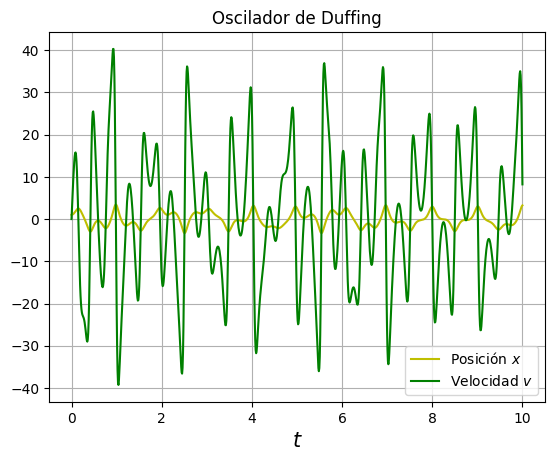

In [22]:
plt.plot(sol.t,sol.y[0],'y-',label='Posición $x$')
plt.plot(sol.t,sol.y[1],'g-',label='Velocidad $v$')
plt.title('Oscilador de Duffing')
plt.xlabel('$t$',size = 15)
plt.legend()
plt.grid()
plt.show()

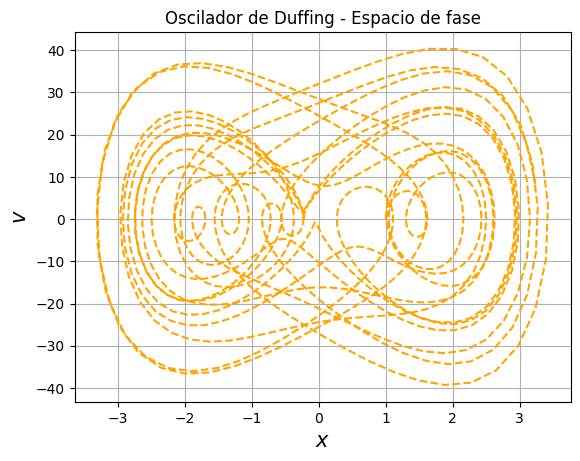

In [23]:
plt.plot(sol.y[0],sol.y[1],'--',color='orange')
plt.title('Oscilador de Duffing - Espacio de fase')
plt.xlabel('$x$',size = 15)
plt.ylabel('$v$',size = 15)
plt.grid()
plt.show()

**Ejemplo (Sincronización - modelo de Kuramoto):** Sirve para modelar cómo se sincronizan arreglos de osciladores armónicos acoplados. Útil para describir la dinámica de redes. Podemos construir una matriz de adyacencia *A* que nos dé la información de qué osciladores están acoplados entre sí. Siendo *θ_i(t)* la fase del i-ésimo oscilador, la manera en la que dicha fase cambia con el tiempo dada su interacción con los demás osciladores, está dada por la siguiente ecuación: \\
*dθ_i(t)/dt = Σ_(j=1)^(N) A_(ij) sin(θ_j(t)-θ_i(t))* \\
Considere un sistema de 5 osciladores, cuya interacción entre sí está descrita con la siguiente matriz de adyacencia: \\
*A = [[0,1,1,1,1],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0]]* (el oscilador 1 está acoplado a todos los demás, y todos los demás sólo están acoplados a 1, grafo de estrella) \\
Considere primero como condiciones iniciales los siguientes casos: \\
1) El oscilador 1 tiene una fase inicial de *θ_1(0)=π/2*, mientras que todos los demás inician con fase en cero. \\
2) Las condiciones iniciales de los osciladores son aleatorias, en el rango de *0* y *π*.

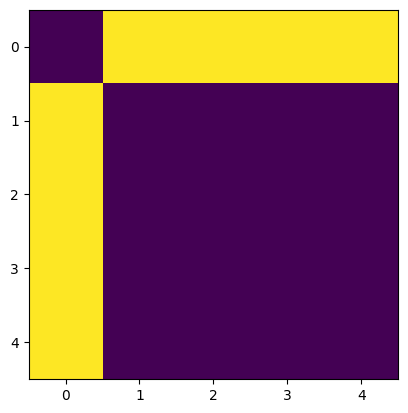

In [24]:
A = [[0,1,1,1,1],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0]]

plt.imshow(A)
plt.show()

In [25]:
def fun(t,y):
  Theta = []
  for i in range(len(A)):
    theta = sum((A[i][j]) * np.sin(y[j]-y[i]) for j in range(len(A)))
    Theta.append(theta)
  return Theta

In [26]:
# 1)

y0 = np.zeros(len(A))
y0[0] = np.pi/2

t_span = [0,10]
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)

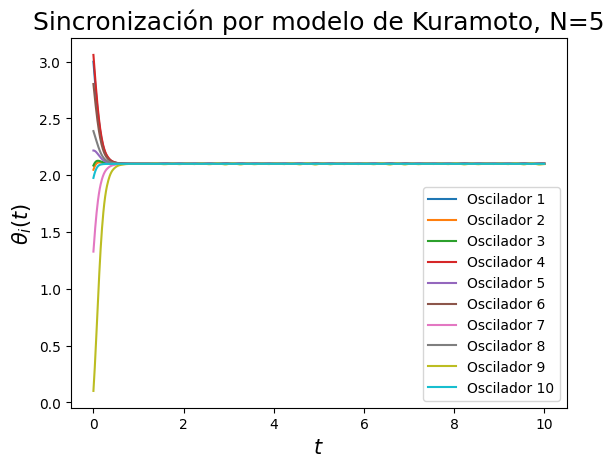

In [46]:
for i in range(len(A)):
  plt.plot(sol.t,sol.y[i],label=f"Oscilador {i+1}")
plt.title('Sincronización por modelo de Kuramoto, N=5',size=18)
plt.xlabel('$t$',size=15)
plt.ylabel(r'$\theta_{i}(t) $',size=15)
plt.legend()
plt.show()

In [47]:
# 2)

y0 = np.pi*np.random.rand(len(A))

t_span = [0,10]
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)

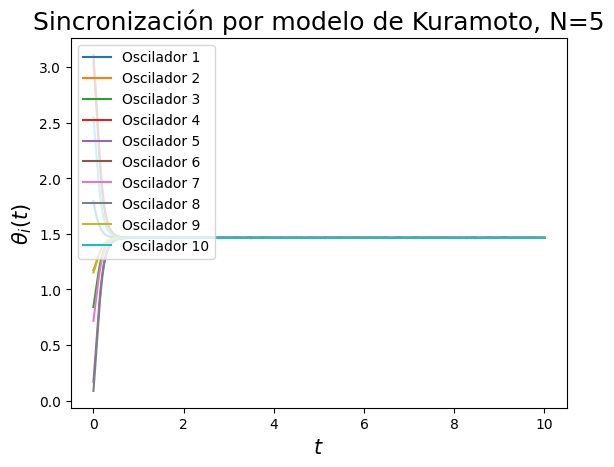

In [48]:
for i in range(len(A)):
  plt.plot(sol.t,sol.y[i],label=f"Oscilador {i+1}")
plt.title('Sincronización por modelo de Kuramoto, N=5',size=18)
plt.xlabel('$t$',size=15)
plt.ylabel(r'$\theta_{i}(t) $',size=15)
plt.legend()
plt.show()

**Parámetro de orden:** Indica el grado de sincronización entre los nodos/osciladores. Si *r(t) = 0* todos los osciladores están desfasados entre sí; si *r(t) = 1*, todos están sincronizados (a lo sumo, desfases de *2π*). Está dado de la siguiente manera: \\
*r(t) = ∑_(j=1)^(N) exp(iθ_j(t))*


In [49]:
# print(f'Las fases de cada oscilador son en un tiempo t son:',sol.y.T)  # Fases
# print(f'Los tiempos t respectivos son:',sol.t)  # Tiempos


In [50]:
N = len(A)  # Número de osciladores
r = np.abs(sum(np.exp(1j*sol.y))/N)
print(f'El parámetro de orden r(t) es:',r)

El parámetro de orden r(t) es: [0.52837497 0.55757922 0.58762974 0.6182832  0.64924634 0.68023733
 0.71089039 0.74074272 0.76939276 0.79650874 0.82183298 0.84518273
 0.86644777 0.88558515 0.90261166 0.9175947  0.93064232 0.94189303
 0.95150594 0.95965181 0.96650918 0.97227895 0.97711437 0.98114637
 0.9844927  0.98725817 0.98953522 0.99140463 0.99293635 0.99419045
 0.99521806 0.99606242 0.99675973 0.99734009 0.99782266 0.99822032
 0.99854665 0.99881344 0.99903085 0.99920759 0.99935104 0.99946743
 0.99956197 0.99963903 0.99970219 0.99975441 0.9997981  0.99983487
 0.99986539 0.99989053 0.9999111  0.99992783 0.99994136 0.99995224
 0.99996097 0.99996796 0.99997355 0.99997803 0.99998166 0.99998464
 0.99998712 0.99998925 0.99999114 0.99999278 0.99999418 0.99999533
 0.99999629 0.99999706 0.99999767 0.99999815 0.99999853 0.99999882
 0.99999904 0.9999992  0.99999932 0.99999941 0.99999948 0.99999953
 0.99999957 0.99999961 0.99999965 0.99999969 0.99999974 0.99999979
 0.99999984 0.99999988 0.999999

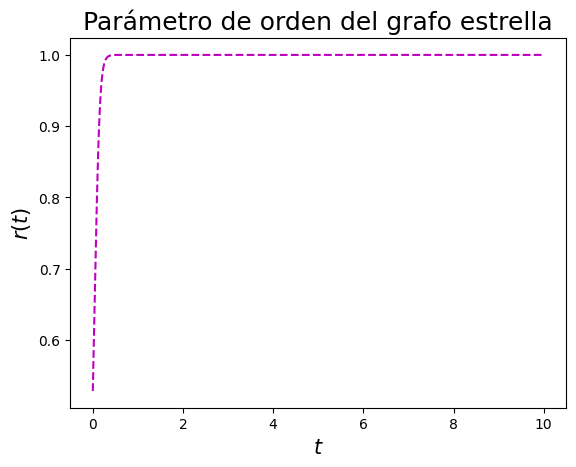

In [51]:
plt.plot(sol.t,r, '--m')
plt.xlabel('$t$',size=15)
plt.ylabel('$r(t)$',size=15)
plt.title('Parámetro de orden del grafo estrella', size=18)
plt.show()

**Ejemplo:** Para 10 osciladores conectados todos entre sí, tenemos la siguiente matriz de adyacencia:

In [52]:
N = 10
A = np.ones([N,N])

for i in range(N):
  A[i,i] = 0

A

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

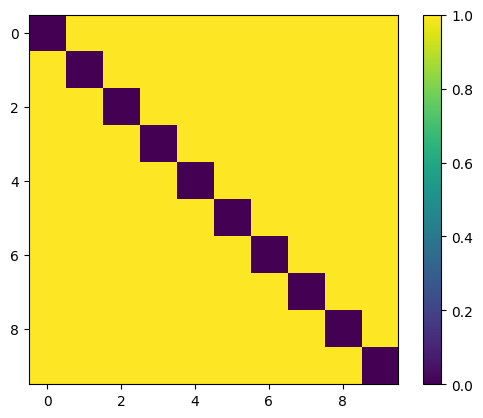

In [53]:
plt.imshow(A)
plt.colorbar()
plt.show()

In [54]:
y0 = np.pi*np.random.rand(len(A))

t_span = [0,10]
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)

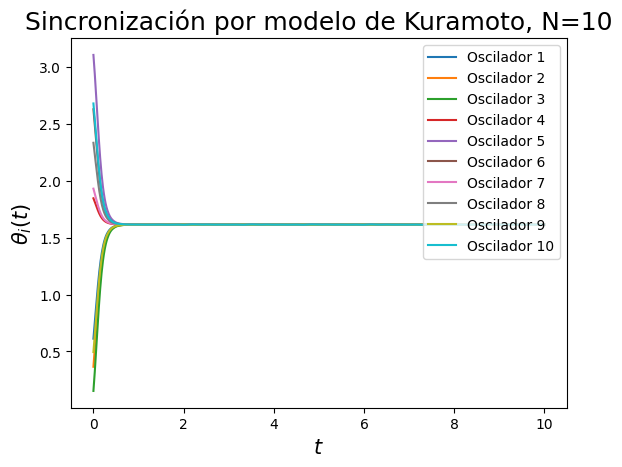

In [58]:
for i in range(len(A)):
  plt.plot(sol.t,sol.y[i],label=f"Oscilador {i+1}")
plt.title('Sincronización por modelo de Kuramoto, N=10',size=18)
plt.xlabel('$t$',size=15)
plt.ylabel(r'$\theta_{i}(t) $',size=15)
plt.legend(loc='upper right')
plt.show()

**Ejemplo:** Un acoplamiento aleatorio de 50 osciladores:

In [61]:
N = 50
A = np.random.rand(N,N)

for i in range(N):
  A[i,i] = 0

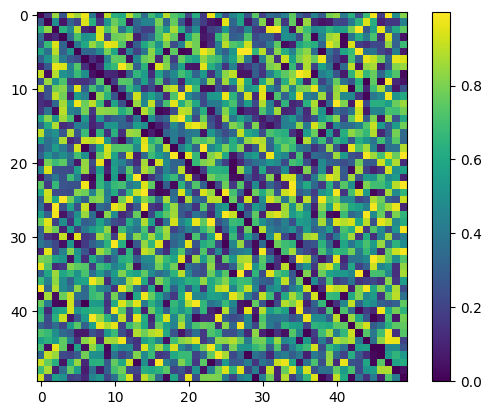

In [62]:
plt.imshow(A)
plt.colorbar()
plt.show()

In [63]:
y0 = np.pi*np.random.rand(len(A))

t_span = [0,10]
t_eval = np.linspace(t_span[0],t_span[1],1000)

sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)

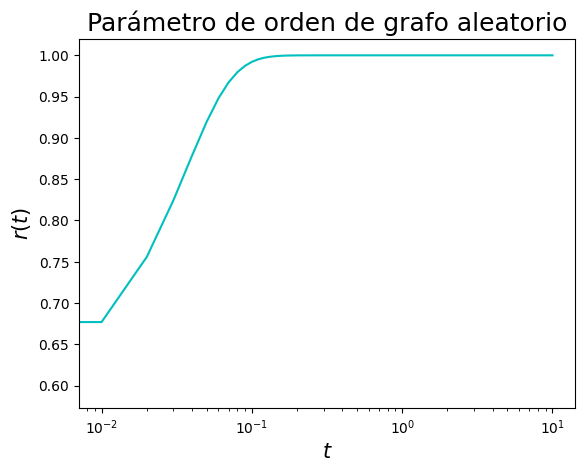

In [69]:
r = np.abs(sum(np.exp(1j*sol.y))/N)
plt.semilogx(sol.t,r, '-c')
plt.xlabel('$t$',size=15)
plt.ylabel('$r(t)$',size=15)
plt.title('Parámetro de orden de grafo aleatorio', size=18)
plt.show()

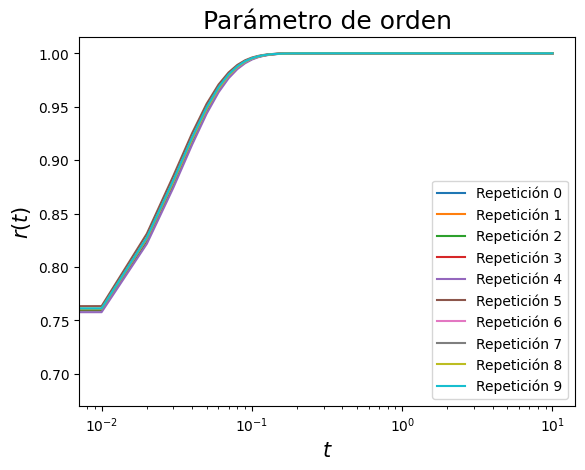

In [72]:
N = 50
y0 = np.pi*np.random.rand(len(A))

for rr in range(10):  # Número de realizaciones
  A = np.random.rand(N,N)
  for i in range(N):
    A[i,i] = 0
  t_span = [0,10]
  t_eval = np.linspace(t_span[0],t_span[1],1000)
  sol = solve_ivp(fun,t_span,y0,t_eval=t_eval)
  r = np.abs(sum(np.exp(1j*sol.y))/N)
  plt.semilogx(sol.t,r,label=f"Repetición {rr+1}")
plt.xlabel('$t$',size=15)
plt.ylabel('$r(t)$',size=15)
plt.title('Parámetro de orden', size=18)
plt.legend(loc='lower right')
plt.show()